In [10]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Set number of exams
num_exams = 50
low_grade_percentage = 0.10
num_low_grades = int(num_exams * low_grade_percentage)

# Event structure
events = []

# Start time
base_time = datetime(2025, 6, 1, 8, 0, 0)

# Helper to generate a random timedelta between 0.2 and 1 hours
def random_time():
    return timedelta(hours=random.uniform(0.2, 1))

# Generate logs
for case_id in range(1, num_exams + 1):
    current_time = base_time

    # Step 1: Lecturer checks Q1
    events.append({"case_id": case_id, "activity": "Check Q1 (Lecturer)", "timestamp": current_time})
    current_time += random_time()

    # Step 2: TA1 checks half of Q2 and Q3
    events.append({"case_id": case_id, "activity": "Check Q2 (TA1) HALF", "timestamp": current_time})
    current_time += random_time()

    events.append({"case_id": case_id, "activity": "Check Q3 (TA1)", "timestamp": current_time})
    current_time += random_time()

    # Step 3: TA2 checks other half of Q2 and Q3
    events.append({"case_id": case_id, "activity": "Check Q2 (TA2) HALF", "timestamp": current_time})
    current_time += random_time()

    events.append({"case_id": case_id, "activity": "Check Q3 (TA2)", "timestamp": current_time})
    current_time += random_time()

    # Step 4: Calculate grade
    events.append({"case_id": case_id, "activity": "Calculate Grade", "timestamp": current_time})
    current_time += random_time()

    # Step 5: Re-check if grade < 50 (simulated for 10% of exams)
    if case_id <= num_low_grades:
        events.append({"case_id": case_id, "activity": "Re-check Exam (Lecturer) And Publish", "timestamp": current_time})
        current_time += random_time()
    else:
        events.append({"case_id": case_id, "activity": "Publish Grade", "timestamp": current_time})
        current_time += random_time()

# Convert to DataFrame
df = pd.DataFrame(events)
df


,case_id,activity,timestamp
0,1,Check Q1 (Lecturer),2025-06-01 08:00:00.000000
1,1,Check Q2 (TA1) HALF,2025-06-01 08:46:29.126274
2,1,Check Q3 (TA1),2025-06-01 09:32:00.171151
3,1,Check Q2 (TA2) HALF,2025-06-01 10:26:01.246618
4,1,Check Q3 (TA2),2025-06-01 11:05:55.735815
...,...,...,...
345,50,Check Q3 (TA1),2025-06-01 09:11:00.903600
346,50,Check Q2 (TA2) HALF,2025-06-01 09:31:57.014440
347,50,Check Q3 (TA2),2025-06-01 09:58:31.960480
348,50,Calculate Grade,2025-06-01 10:19:57.898142


In [11]:
# Save to CSV
csv_path = "exam_checking_log.csv"
df.to_csv(csv_path, index=False)

csv_path

'exam_checking_log.csv'

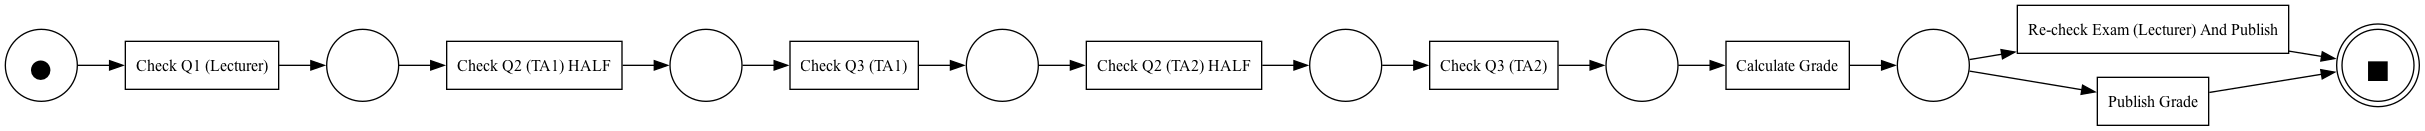

''

In [12]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Load your DataFrame from the CSV
df = pd.read_csv("exam_checking_log.csv", parse_dates=["timestamp"])

# Rename columns to match PM4Py expectations
df_pm4py = df.rename(columns={
    "case_id": "case:concept:name",
    "activity": "concept:name",
    "timestamp": "time:timestamp"
})

# Convert DataFrame to EventLog
event_log = log_converter.apply(df_pm4py, parameters={
    log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: "case:concept:name"
})

# Apply Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(event_log)

# Visualize and export
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)  # View interactively
pn_visualizer.save(gviz, "exam_petri_net_from_df.png")  # Save as image
